# Regresion Lineal

En este ejemplo intentaremos adivinar cuantos likes tiene un video de tiktok a partir de la cantidad de vistas

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
# tiktok vistas y likes de distintos videos

views = [234_000, 8_000, 217_000, 25_000, 62_000, 107_000, 
         140_000, 191_000, 189_000, 496_000, 221_000, 238_000]
likes = [ 39_000,   362,  31_000,  1_500,  4_000,   5_000,   
           6_000,  15_000,  11_000,  30_000,  30_000,  31_000]

In [112]:
df = pd.DataFrame({"Views":views,"Likes":likes})

In [113]:
df.head()

,Views,Likes
0,234000,39000
1,8000,362
2,217000,31000
3,25000,1500
4,62000,4000


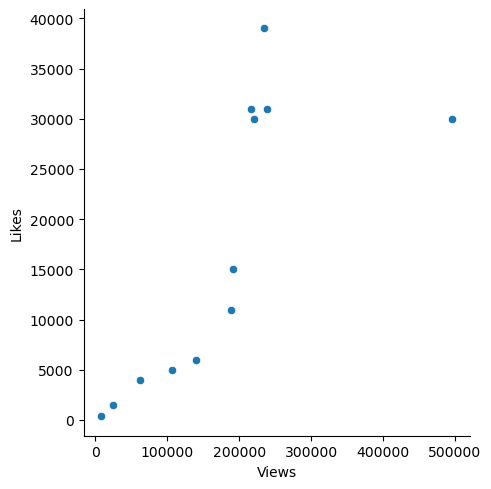

In [114]:
sns.relplot(x="Views",y="Likes", data=df);

## Regresion Lineal

Suponemos que la cantidad de likes es linealmente proporcional a la cantidad de vistas

In [115]:
#https://en.wikipedia.org/wiki/Simple_linear_regression
df["x - xmean"] = df["Views"] - df["Views"].mean()
df["y - ymean"] = df["Likes"] - df["Likes"].mean()
df["sq(x - xmean)"] = df["x - xmean"] * df["x - xmean"]

In [116]:
df.head()

,Views,Likes,x - xmean,y - ymean,sq(x - xmean)
0,234000,39000,56666.666667,22011.5,3.211111e+09
1,8000,362,-169333.333333,-16626.5,2.867378e+10
2,217000,31000,39666.666667,14011.5,1.573444e+09
3,25000,1500,-152333.333333,-15488.5,2.320544e+10
4,62000,4000,-115333.333333,-12988.5,1.330178e+10


In [117]:
w = np.sum(df["x - xmean"] * df["y - ymean"]) / df["sq(x - xmean)"].sum()

In [118]:
w

0.08269744274379914

In [119]:
b = np.mean(df["Likes"] - w * df["Views"])

In [120]:
b

2323.4868200996184

In [121]:
linea = lambda x: w * x + b

In [122]:
coef = np.polyfit(df["Views"],df["Likes"],1)
linea = np.poly1d(coef)
print(coef)
print(linea)

[8.26974427e-02 2.32348682e+03]
 
0.0827 x + 2323


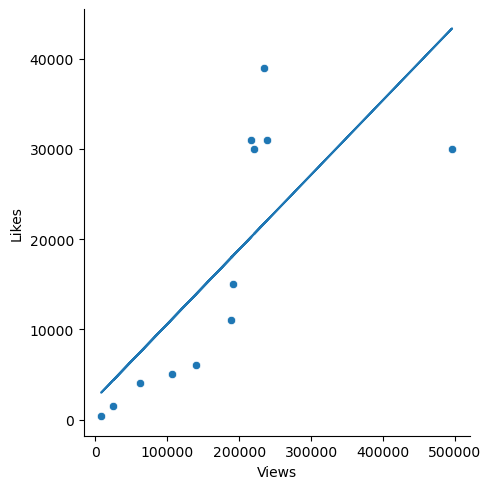

In [123]:
sns.relplot(x="Views",y="Likes", data=df)
plt.plot(df["Views"], linea(df["Views"]), '-');

## Usando la libreria Scikit Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [133]:
from sklearn.linear_model import LinearRegression
X = df.loc[:,["Views"]]
y = df["Likes"]
reg = LinearRegression().fit(X, y)

In [134]:
reg.coef_

array([0.08269744])

In [135]:
reg.intercept_

2323.486820099617

## Parametros Polinomiales

Podemos generar nuevas columnas con x^2, x^3 y asi sucesivamente.

Si hay varias variables tambien podemos generar sus combinaciones, por ejemplo x*y

In [124]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [125]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [126]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

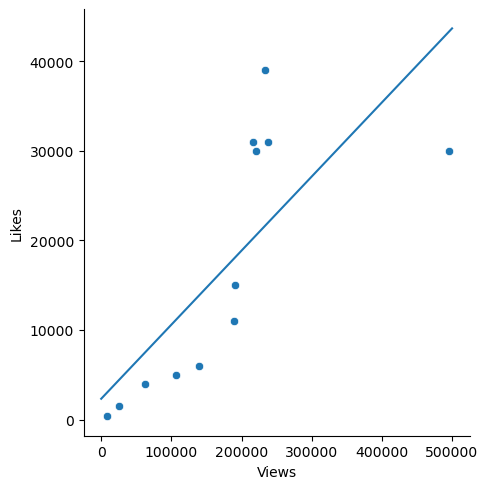

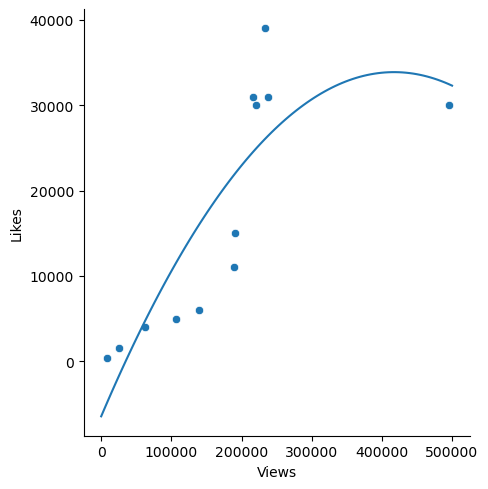

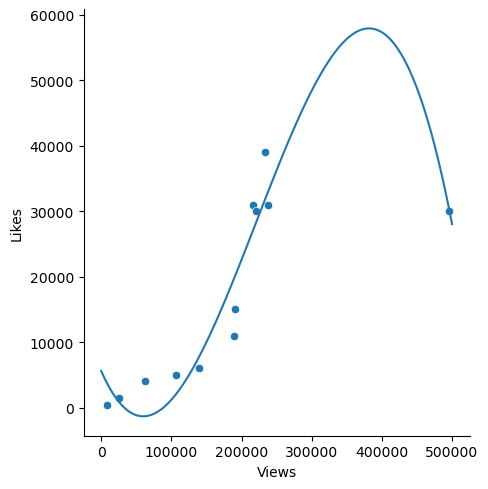

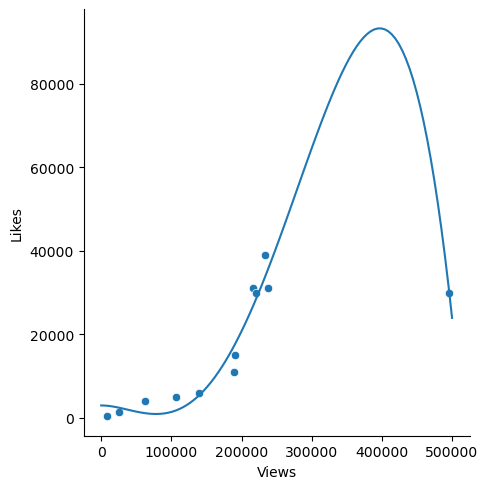

In [168]:
X = df.loc[:,["Views"]]
y = df["Likes"]
for p in [1,2,3,4]:
    poly = PolynomialFeatures(p)
    Xpoly = poly.fit_transform(X)
    reg = LinearRegression().fit(Xpoly, y)
    sns.relplot(x="Views",y="Likes", data=df)
    plotx = np.linspace(0,500_000,100)[...,None]
    plotxpoly = poly.fit_transform(plotx)
    plt.plot(plotx, reg.predict(plotxpoly), '-');

## Usando statsmodels 

https://www.statsmodels.org/stable/regression.html

In [170]:
import statsmodels.api as sm
x_train = df.loc[:,["Views"]]
y_train = df["Likes"]

In [176]:
# Agregar una constante
X = sm.add_constant(x_train)

# Crear el modelo de Ordinary Least Squares
model = sm.OLS(y_train, X)
res = reg.fit()

# Mostrar los parametros
b = res.params[0]
w = res.params[1]
print(f"b:{b} w:{w}")
print(res.summary())

b:2323.4868200996175 w:0.08269744274379917
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 12 Jun 2023   Prob (F-statistic):            0.00453
Time:                        09:19:49   Log-Likelihood:                -126.14
No. Observations:                  12   AIC:                             256.3
Df Residuals:                      10   BIC:                             257.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

/Users/hernanamiune/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
